In [1]:
import tensorflow as tf #>>>> usar python 3.6 0 menor (crear un nuevo envirroment)<<<<<<<

In [2]:
#Todo lo que se maneja en TensorFlow es en tensores (vectores, matrices)

x1 = tf.constant([1,2,3,4,5])

x2 = tf.constant([6,7,8,9,10])

res = tf.mul(x1,x2)

In [3]:
#Para poder observar los resultados se tiene que inicar una sesion

with tf.Session() as sess:
    output = sess.run(res)
    print(output)

[ 6 14 24 36 50]


In [4]:
#Configuracion para Logs
config = tf.ConfigProto(log_device_placement = True)

# Caso:Señales de Transito

## Analisis de Datos

In [5]:
import tensorflow as tf
import os
import skimage.data as imd
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
#Metodo que carga las imagenes de un directorio

def load_ml_data(data_directory):
    
    #carpetas=carpetas dentro de data_directory
    #d=elemento dentro de data_directory
    
    carpetas = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = [] #nombres de carpetas
    images = []
    
    for name in carpetas:
        label_dir = os.path.join(data_directory, name)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(name))
        
    return images, labels

In [7]:
main_dir = "../python-ml-course/datasets/belgian/"

train_data_dir = os.path.join(main_dir, "Training")

test_data_dir = os.path.join(main_dir, "Testing")

In [8]:
images, labels = load_ml_data(train_data_dir)

images = np.array(images) #Recordar que en TensorFlow todo son arreglos

labels = np.array(labels) #Recordar que en TensorFlow todo son arreglos

print(images.ndim) # numero de dimensiones de array ("ancho")

print(images.size) #tamaño de array (size cuenta todos los elementos hijo)

1
4575


In [9]:
#print(images[0]) #imagen en la posicion 0, la lista de los 3 valores, representa un pixel[R,G,B]
print('Shape:',images[0].shape) # el ultimo elemento repesenta el canal de color (RGB)
print('Alto (filas):',len(images[0]))
print('Ancho (columnas):',len(images[0][0])) 
print('Total de pixeles:',(int(images[0].size/3)))  #(size cuenta todos los elementos hijo,es decir, al ser una imagen a color, los 3 valores de cada pixel(RGB) se cuentan)
print(images[0][0][0]) # pixel de imagen 1 --> [R,G,B]
#plt.axis("off")
#plt.imshow(images[0])
#plt.show()

Shape: (83, 82, 3)
Alto (filas): 83
Ancho (columnas): 82
Total de pixeles: 6806
[229 254 240]


In [10]:
unique_labels=set(labels) #numero de carpetas sin repetirse
len(set(labels))

62

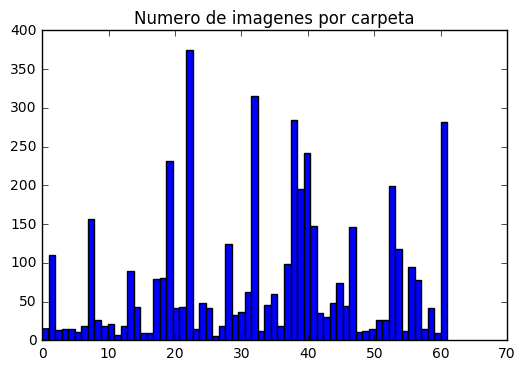

In [11]:
plt.hist(labels, len(set(labels)))
plt.title('Numero de imagenes por carpeta')
plt.show()

In [12]:
rand_signs = random.sample(range(0, len(labels)), 6) #escoger seis imagenes al azar
rand_signs

[3742, 1019, 1863, 4489, 2025, 3125]

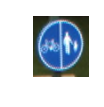

Forma:(71, 63, 3), Color-min:7, Color-max:255


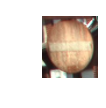

Forma:(110, 97, 3), Color-min:14, Color-max:255


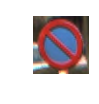

Forma:(62, 58, 3), Color-min:16, Color-max:255


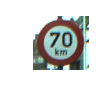

Forma:(81, 82, 3), Color-min:9, Color-max:255


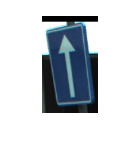

Forma:(148, 83, 3), Color-min:0, Color-max:255


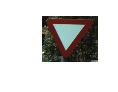

Forma:(175, 206, 3), Color-min:0, Color-max:255


In [13]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, Color-min:{1}, Color-max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

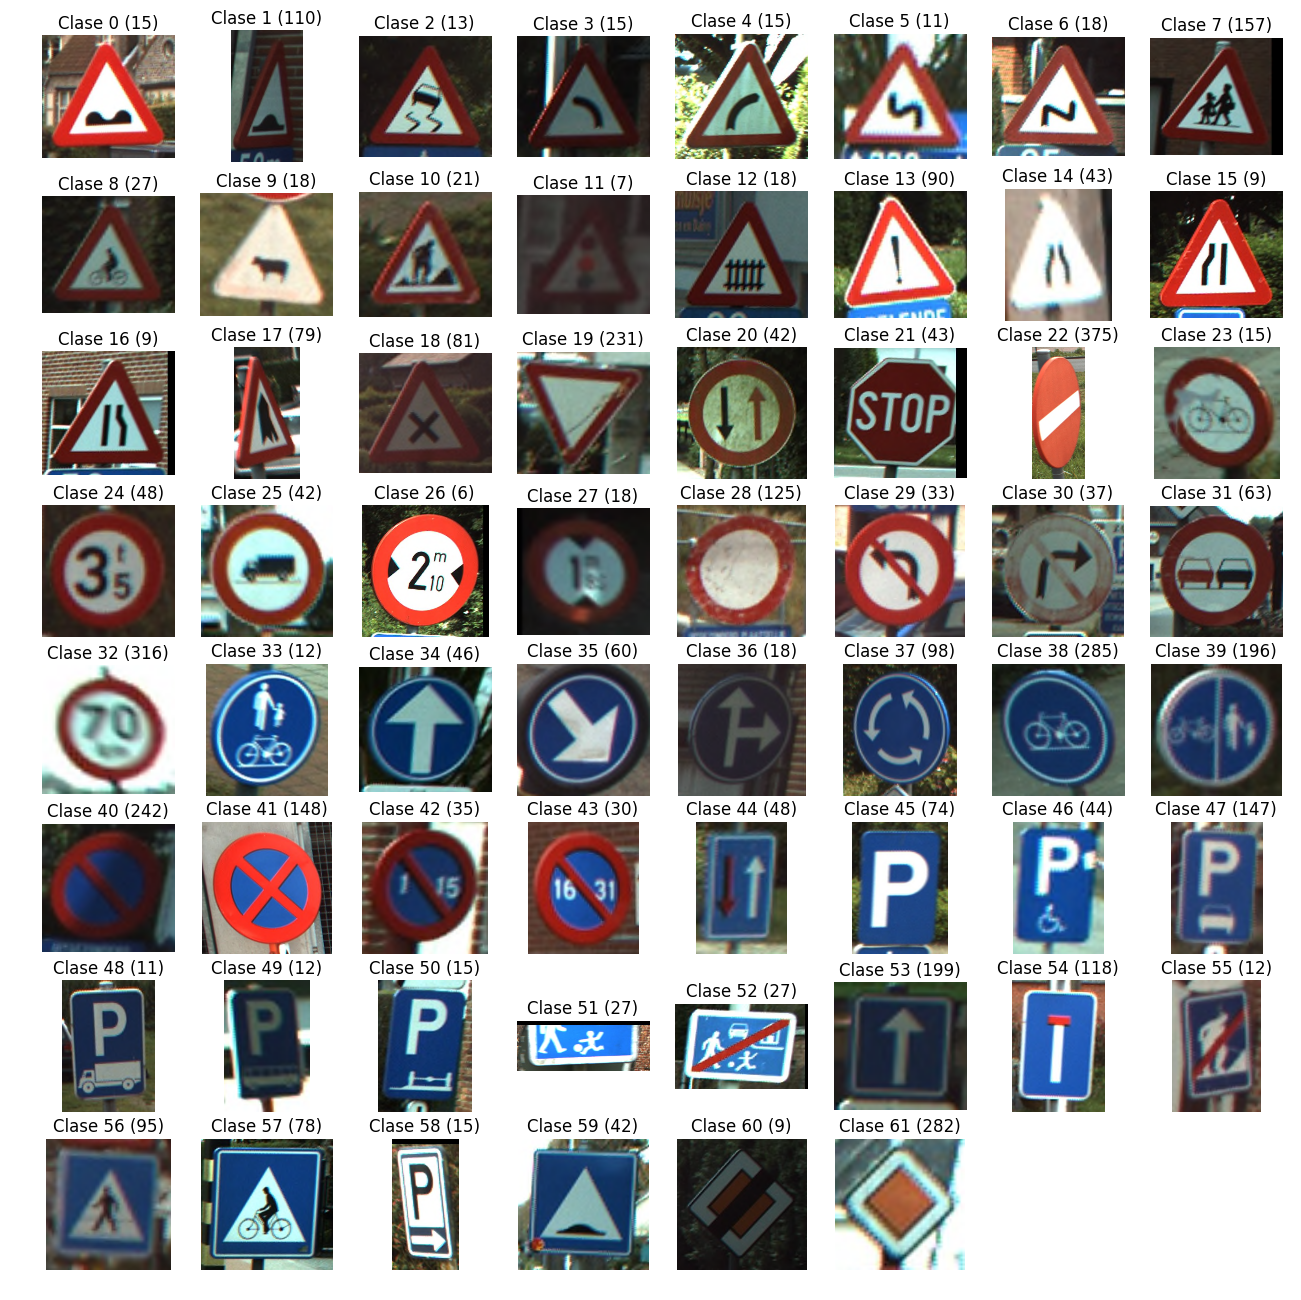

In [14]:
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

*** Se concluye que las imagenes se tienen que estadarizar de tamaño ***

In [15]:
#Descubrir imagen mas pequeña

w = 9999 
h = 9999

for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


### Al ser imagenes de diferentes tamaños, se tiene que estandarizar uno (tamaño)

In [16]:
from skimage import transform

In [17]:
images30 = [transform.resize(image, (30,30)) for image in images]

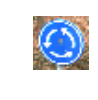

Forma:(30, 30, 3), min:0.0576470588235286, max:1.0


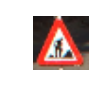

Forma:(30, 30, 3), min:0.05111111111110906, max:1.0


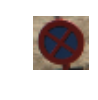

Forma:(30, 30, 3), min:0.05941176470588235, max:0.8515686274509946


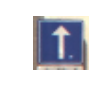

Forma:(30, 30, 3), min:0.18115032679738532, max:1.0


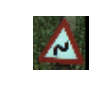

Forma:(30, 30, 3), min:0.0, max:0.954627450980392


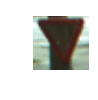

Forma:(30, 30, 3), min:0.0722875816993463, max:1.0


In [18]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

### Una vez enstandarizado el tamaño, se pasa a escala de grises (los colores no son utiles en TensorFlow)

In [19]:
from skimage.color import rgb2gray

In [20]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

In [21]:
print('Total de pixeles:',(int(images30[0].size)))  #(size cuenta todos los elementos hijo)
print('Ancho:',len(images30[0][0])) 
print('Alto:',len(images30[0]))
print('Shape:',images30[0].shape) # el ultimo elemento repesenta el canal de color (RGB)
print(images30[0][0][0]) # pixel de imagen 
#plt.axis("off")
#plt.imshow(images[0])
#plt.show()

Total de pixeles: 900
Ancho: 30
Alto: 30
Shape: (30, 30)
0.964637177778


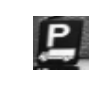

Forma:(30, 30), min:0.10460307843137313, max:0.8761713039215686


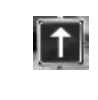

Forma:(30, 30), min:0.1290667483660126, max:1.0


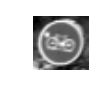

Forma:(30, 30), min:0.12419486274509806, max:0.9850832941176472


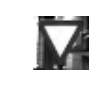

Forma:(30, 30), min:0.08350850980392147, max:1.0


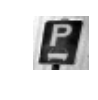

Forma:(30, 30), min:0.10231803921568627, max:0.30574045751633994


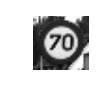

Forma:(30, 30), min:0.0564239694989109, max:1.0


In [22]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

## Creacion de Red Neuronal

In [23]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30]) #entrada del preceptron (siempre se hace un placeholder, que es solo un contenedor), shape recibira elementos de 30*30

y = tf.placeholder(dtype = tf.int32, shape = [None]) #salida de perceptron(placeholder, como solo es una salida shape=[None]

images_flat = tf.contrib.layers.flatten(x) #valores de entrada estandarizados (aplanados, listados e una dimension)

#ecuacion
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu) #conexion (logistica) de red neronal fully_conected(valores de entrada,valores de salida,capa neuronal)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits)) #funcion de perdida (metrica para ver como va mejorando la red neuronal)

train_opt = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss) # Funcion de entrenamiento 

final_pred = tf.argmax(logits,1) #Funcion de prediccion (1 salida)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32)) # Funcion para conocer la efectividad de la red neruonal

In [24]:
tf.set_random_seed(1234) #semilla para poder repoducir el mismo modelo

sess = tf.Session()

sess.run(tf.initialize_all_variables())

for i in range(601): #nmero de iteraciones (Ecpoh) para entrenar red neuronal
    
    _, accuracy_val = sess.run([train_opt, accuracy], #sess.run([funcion de entrenamiento,valor a predecir],datos de entrada y salida)
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    #_, loss_val = sess.run([train_opt, loss],
    #                          feed_dict= {
    #                              x: images30,
    #                              y: list(labels)
    #                          })
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        #print("Pérdidas:", loss_val)
        #print("Fin del Ecpoh ", i)

EPOCH 0
Eficacia:  45.522
EPOCH 50
Eficacia:  32.5226
EPOCH 100
Eficacia:  32.5139
EPOCH 150
Eficacia:  32.1093
EPOCH 200
Eficacia:  33.0076
EPOCH 250
Eficacia:  33.8166
EPOCH 300
Eficacia:  34.4168
EPOCH 350
Eficacia:  34.7556
EPOCH 400
Eficacia:  35.108
EPOCH 450
Eficacia:  35.2667
EPOCH 500
Eficacia:  35.3309
EPOCH 550
Eficacia:  35.3829
EPOCH 600
Eficacia:  35.4227


## Evaluacion de la red Neuronal

In [25]:
test_images, test_labels = load_ml_data(test_data_dir)

test_images30 = [transform.resize(im,(30,30)) for im in test_images]

test_images30 = rgb2gray(np.array(test_images30))

prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [26]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
print('Del total de ',len(prediction),' muestras', match_count,' acertaron')

acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Del total de  2520  muestras 1519  acertaron
Eficacia de la red neuronal: 60.28


## Ejemplos

In [27]:
sample_idx = random.sample(range(len(test_images30)), 40)
sample_images = [test_images30[i] for i in sample_idx]
sample_labels = [test_labels[i] for i in sample_idx]

sample_prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]
sample_prediction

array([19, 32, 38, 32, 18, 32,  7, 39, 19, 32, 32, 38, 17, 22, 32, 53, 32,
       38, 22, 28, 32,  7, 38, 19, 61,  7, 31, 40, 41, 32, 19, 32, 13, 31,
       22, 38,  7, 19,  7, 28])

In [30]:
#sample_labels

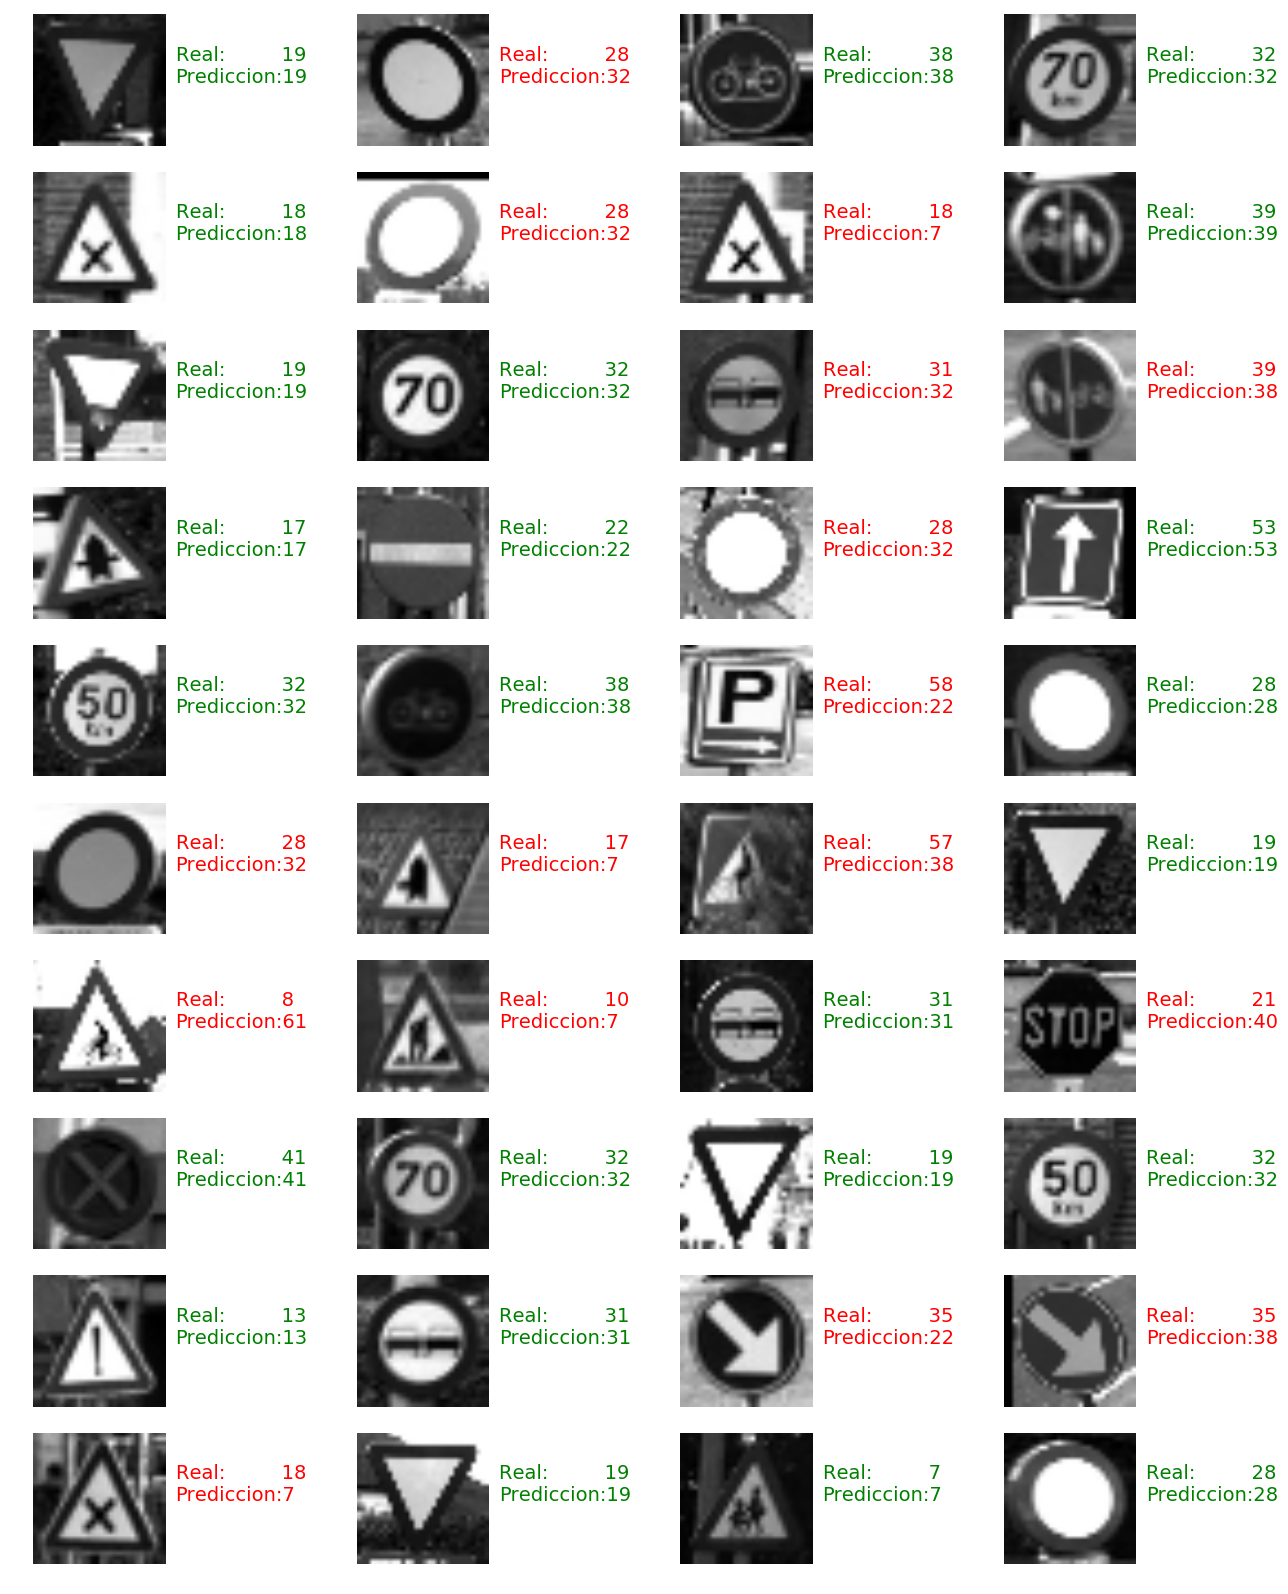

In [29]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = sample_prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32,15, "Real:         {0}\nPrediccion:{1}".format(truth, predi),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()